<img src="https://raw.githubusercontent.com/OpenMRBenelux/openmrbenelux.github.io/afba2aa7c94cd7ad0f2757aca0efc18d8ee3154d/assets/ext_images/logo/openmr_benelux_2021_logo_regopen.svg">

# Python Visualisation Tutorial

Hello there, and welcome to our visualisation workshop!

This tutorial is entirely dedicated to offer useful tools to get started with visualisations in Python, with examples on neuro-imaging data. 

The data that we will explore today is part of an [open source repository](https://openneuro.org/datasets/ds003542) on adult language learners. We express our sincere gratitude to Kshipra Gurunandan, Manuel Carreiras and Pedro M. Paz-Alonso for making this data open source. Below, we will first print the README file that contains the explanation about the objective of this study.

In [1]:
# Set matplotlib inline to view images below the cell in this notebook
%matplotlib inline 

# To prettify python code (it is already pretty of course ;) ) --> https://pypi.org/project/nb-black/
%load_ext nb_black 

<IPython.core.display.Javascript object>

In [2]:
import os
from bids import BIDSLayout  # BIDS: For neat neuro-imaging data organisation --> https://bids.neuroimaging.io/

data_folder = "../inputs/ds003542"
layout = BIDSLayout(data_folder)

# Description of the project
with open(os.path.join(data_folder, "README")) as txt_file:
    README_sections = txt_file.read().split(f'{"-"*34}')
    project_description = README_sections[0]
    references = README_sections[1]
    contact = README_sections[3]

/Users/sdenissen/Documents/Code_Git/openmr2021-dataviz-workshop-python/venv/lib/python3.7/site-packages/bids/layout/models.py:152: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  FutureWarning)


<IPython.core.display.Javascript object>

In [3]:
print(project_description)

Study design:

34 adult language learners aged 20-70 were recruited from a language school. Subjects were at either intermediate or advanced levels of learning the same second language. Subjects performed semantic comprehension (reading and speech) and verbal production tasks in the MRI scanner in their native and new languages.




<IPython.core.display.Javascript object>

***

## Wait, what ...? A Jupyter notebook?

Never worked with jupyter notebooks before? Don't worry! We'll guide you through it step by step.

A **jupyter notebook** 
- is a convenient way to combine code with neat documentation, allowing others to easily follow a project that uses code
- works with so-called "blocks", which can either be a "code block" or a "markdown block"
    - *Markdown block*: You are reading one right now! It is a block that understands the markdown language, an easy language to create text, similar to HTML and LaTeX.
    - *Code block*: A code block in a jupyter notebook understands the Python language by default. If applicable, output is printed below the code block, such as images and text. You can also change the kernel of code blocks; in this way you can use other programming languages in the code blocks! Read more about this [here](https://jupyter4edu.github.io/jupyter-edu-book/jupyter.html).
- Allows to "hide" blocks, which will be visible with 3 dots (...). Solutions are hidden this way, but first try to find the solution yourself in the empty block above!
- has some nice shortcuts:

|Operation|Shortcut|
|---|---|
|Run a cell|shift-enter|
|Add cell above | "a" (first click left of the cell)|
|Add cell below | "b" (first click left of the cell)|
|Copy cell: | "c" (first click left of the cell)|
|Cut cell: | "x" (first click left of the cell)|
|Paste cell | "v" (first click left of the cell)|
|Delete cell | "dd" (first click left of the cell)|

Last note: If you want to install additional python packages, you can call upon the terminal with an exclamation mark (!) before a command. So, installing a new package will be the following structure inside a code cell: `!pip install my-package`

***

## Let's get started!
### Table of contents
0. Preparations
1. Visualising neuro-imaging data
    - What is a nifti (.nii)?
    - Anatomical MRI - T1w
    - Functional MRI (fMRI)
2. ...
3. ...

***

# 0. Preparations

Import some general packages

In [11]:
# Data handling
import pandas as pd
import numpy as np

# Data description
import json

# Neuro-imaging packages
import nibabel as nib
import nilearn as nil

# Self-made functions
from python.functions import show_slice, track_voxel, simulate_volume

<IPython.core.display.Javascript object>

***

# 1. Visualising neuro-imaging data

The data was downloaded from OpenNeuro, [project ds003542](https://openneuro.org/datasets/ds003542/versions/1.0.0), which originates from a study on language learners. We only extracted data from subject 1. Hence, the data is present in the "ds00352-download" folder, subdirectory "sub-01":
- Anatomical MRI: "anat" subfolder
- Functional MRI: "func" subfolder

Let's define the paths:

In [5]:
# We use the BIDS data organisation to get our desired data from our data folder. 
# Index [0] at the end: to get the string from the 1-element vector.
t1w_path = layout.get(
    subject="01", suffix="T1w", extension=".nii.gz", return_type="filename"
)[0]
bold_path = layout.get(
    subject="01",
    task="compL1",
    run="1",
    suffix="bold",
    extension=".nii.gz",
    return_type="filename",
)[0]

<IPython.core.display.Javascript object>

## 1.1 What is a nifti (.nii)?

For a thorough explanation on the origin and objective of nifti, we refer to [this webpage](https://nifti.nimh.nih.gov/). In short however, the nifti file format has been proposed to 

## 1.2 Anatomical MRI - T1w

Click [here](https://nipy.org/nibabel/coordinate_systems.html) for the source article in nibabel.\
Note that this anatomical T1w nifti is a 3D image, with each dimension being a spatial dimension (x, y and z), corresponding to a body axis (medio-lateral, antero-posterior and cranio-caudal).

### 1.2.1 Let's first search for the nifti file in our directory! 

In [6]:
t1w_file = nib.load(t1w_path)  # Upload the nifti file with nibabel. The path indicates the Nifti's location.
t1w_image = (t1w_file.get_fdata())  # Get the 3D numpy array that contains grey values of the voxels

FileNotFoundError: No such file or no access: '/Users/sdenissen/Documents/Code_Git/openmr2021-dataviz-workshop-python/inputs/ds003542/sub-01/anat/sub-01_T1w.nii.gz'

<IPython.core.display.Javascript object>

### 1.2.2 What are the dimensions of the numpy array?

In [ ]:
t1w_shape = ...
print(f"Shape of the 3D numpy array: {...}")
print(f"- # Medio-lateral voxels: {...}")
print(f"- # Antero-posterior voxels: {...}")
print(f"- # Cranio-caudal voxels: {...}")

Solution:

In [ ]:
t1w_shape = t1w_image.shape
print(f"Shape of the 3D numpy array: {t1w_shape}")
print(f"- # Medio-lateral voxels: {t1w_shape[0]}")
print(f"- # Antero-posterior voxels: {t1w_shape[1]}")
print(f"- # Cranio-caudal voxels: {t1w_shape[2]}")

### 1.2.3 Let's show a single slice of the 3D numpy array.
To do this, we can index the object, for which step 2 will help us!\
We want to extract axial slice 150. 

Hint: indexing of the `t1w_image` object will be as follows: `t1w_image[ML_direction, AP_direction, CC_direction]`, with each element consisting of either a single value, or a range (e.g. `5:9`). To select everyting along an axis, just pass `:`. ML = Medio-lateral, AP = Antero-posterior, CC = Cranio-caudal.

In [ ]:
t1w_slice = t1w_image[:, :, 150]
fig, ax = plt.subplots()
ax.imshow(t1w_slice.T, cmap="gray", origin="lower")

Solution:

- All voxels in the Medio-lateral direction must be selected, so `:` in the fist position
- All voxels in the Antero-posterior direction must be selected, so `:` in the second position
- Only voxel number 150 must be selected in Cranio-caudal direction, so `150` in the second position

Hence, we will index the image as follows: `[:,:,150]`

We have also created a function (`show_anatomical_slice`) for you to easily investigate your T1w image. You can consult the source code in the `functions.py` file. 

To use it, just run `show_anatomical_slice(image = t1w_image, orientation = 'axial', slice_nr = 150)` in the next cell. Play around with the `orientation` and `slice_nr` parameters at will!

**REMARK: Defacing**\
Run the following code block in a new cell: `show_anatomical_slice(t1_image, 'sagittal', 100)`.\
In this slice, you can nicely see that this nifti image has been "defaced", to ensure anonimity. This essentially means that, inside the 3D numpy array, all values that relate to the face were set to 0 (black)!

## 1.3 Functional MRI (fMRI)

First things first: a functional MRI image has a fourth dimension, time!\
Hence, a nifti file is a 4D numpy array, with the first 3 dimensions being spatial (x: medio-lateral, y: antero-posterior and z: craniocaudal), and the 4th being time!

EXTRA: For the most fancy experience, you can replace the `color_map` parameter inside the `show_functional_slice` and `track_voxel` functions with one of the options listed in [this link](https://matplotlib.org/stable/tutorials/colors/colormaps.html). This will change the colors of your image, check it out! :) 

### 1.3.1 Let's first search for the nifti file in our directory! 

In [ ]:
bold_file = nib.load(bold_path)  # Upload the nifti file with nibabel
bold_image = (bold_file.get_fdata())  # Get the 3D numpy array that contains grey values of the voxels

### 1.3.2 What are the dimensions of the numpy array?

In [ ]:
bold_shape = ...
print(f"Shape of the 3D numpy array: {...}")
print(f"- # Medio-lateral voxels: {...}")
print(f"- # Antero-posterior voxels: {...}")
print(f"- # Cranio-caudal voxels: {...}")
print(f"- # Timepoints: {...}")

Solution:

In [ ]:
bold_shape = bold_image.shape
print(f"Shape of the 3D numpy array: {bold_shape}")
print(f"- # Medio-lateral voxels: {bold_shape[0]}")
print(f"- # Antero-posterior voxels: {bold_shape[1]}")
print(f"- # Cranio-caudal voxels: {bold_shape[2]}")
print(f"- # Timepoints: {bold_shape[3]}")

### 1.3.3 Let's show a single slice again!
You can use your answer to section 1.2.3 to answer this one. We want to visualize axial slice 10.

Solution:

- All voxels in the Medio-lateral direction must be selected, so `:` in the fist position
- All voxels in the Medio-lateral direction must be selected, so `:` in the second position
- Only voxel number 150 must be selected in Cranio-caudal direction, so `10` in the second position
- We consider the first timepoint, so the last dimension (time) should be indexed as `0`

Hence, we will index the image as follows: `[:,:,10,0]`

In [ ]:
bold_slice = bold_image[:, :, 10, 0]
fig, ax = plt.subplots()
ax.imshow(bold_slice.T, cmap="gray", origin="lower")

Question: When looking at the spatial dimensions and compare it to the T1w image, what do you notice?

Answer:

We see that the resolution of the fMRI is far less than the T1w image! This is why we chose axial slice 20 instead of 150 (which was the case for T1w); slice 150 doesn't exist in this fMRI image!

We have also created a function (`show_functional_slice`) for you to easily investigate your fMRI image. You can consult the source code in the `functions.py` file. 

To use it, just run `show_functional_slice(image = bold_image, orientation = 'axial', slice_nr = 10, timepoint = 0)` in the next cell. Play around with the `orientation`, `slice_nr` and `timepoint` parameters at will!

### 1.3.4 Let's track a voxel over time!

In this step, we will explore how we track a single voxel over time. This will show how the BOLD value inside the voxel in a T2* image changes over the 4th dimension, time. We want to visualize the voxel with the following spatial characteristics:
- Medio-lateral position: 30
- Antero-posterior position: 53
- Cranio-caudal position 20

Hint: Use matplotlib (already loaded). The following functions might be useful: `fig,ax = plt.subplots()` and `ax.plot()`

Solution:

In [ ]:
fig, ax = plt.subplots()
voxel_BOLD_vector = bold_image[30, 53, 20, :]
ax.plot(voxel_BOLD_vector)
plt.show()

Perhaps it might be nice to see the spatial location of the tracked voxel in 3 different planes of the MRI image. Run the following code block in a next cell reveal its location: `track_voxel(bold_image, 30, 53, 20, voxel_color='lightgreen')`.

***

# 2. Visualisation on a dataframe

We will first upload the following: 
- data: `participants.tsv`
- description of the data: `participants.json`

In [12]:
# Data. This is a .tsv (tab-separated) file
table_path = os.path.join(data_folder, "participants.tsv")
df = pd.read_csv(table_path, sep="\t") # Separator "\t" since it is a .tsv file
df['sex'] = df['sex'].apply(lambda x: x.replace(' ', ''))  # Remove the space after M and F

# Data description. This is within a 
with open(os.path.join(data_folder, "participants.json")) as json_file:
    df_description = json.load(json_file)
    df_description = pd.DataFrame(df_description)
    df_description = df_description.drop("TermURL", axis=0)

<IPython.core.display.Javascript object>

Additionally, we are going to add some artificial data. We will calculate whole brain and gray matter volume, for which we will use the following regression equations (calculated on segmented open source healthy control data):

$$WholeBrain = 1696.06 - 3.34Age$$
$$GrayMatter = 1041.07 - 2.84Age$$

We will also add some Gaussian noise to both data vectors. We will use the pandas `.apply()` function, applied to a pandas Series object. The `simulate_volume` function will be applied, passing 2 extra arguments, being the `intercept` and the `slope` of the regression equation. The first argument, `age`, will be provided by the Series object.

In [15]:
df['whole_brain'] = df['age'].apply(simulate_volume, args = (1696.06, -3.34))
df['gray_matter'] = df['age'].apply(simulate_volume, args = (1041.07, -2.84))

<IPython.core.display.Javascript object>

# 2.1 Explore the dataframes quantitatively

Get a sneak preview of the data `df.head()` and the full data description `df_description`

Get a quick insight in the distribution of the data. For this, you can use e.g. `df.describe()` and `df.info()`

## 2.2 Basic visualisation with matplotlib

Let's go through the basics of matplotlib first in order to visualize how your data is distributed. We will use matplotlib.pyplot, which we will import under the name `plt`. Thus, make sure to run this command: `import matplotlib.pyplot as plt`. A general way to start plotting:
1. Initiate a figure instance: `fig = plt.Figure()`
2. Add the desired plot. In this case, we will add a histogram: `plt.hist(x)`, x being the data vector to show (e.g. a column).
3. Tidy up your figure. Quick note: you can change the font sizes with an extra argument (`fontsize = ...`) to all of the functions below. Some quick things we can change (examples: x axis, same applies to y):
    - Labels: `plt.xlabel('label')`
    - Ticklabels sizes: `plt.xticks(fontsize = ...)`
    - Title: `plt.title('title')`
4. End with `plt.show()` to show the figure

Now it's up to you! Plot the distribution of the `age` column with a histogram.

Solution:

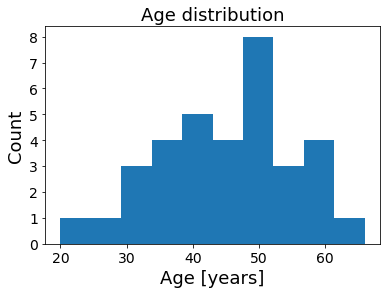

<IPython.core.display.Javascript object>

In [16]:
import matplotlib.pyplot as plt
fig = plt.Figure()
plt.hist(df['age'])
plt.xlabel('Age [years]', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Age distribution', fontsize = 18)
plt.show()

Now, we will plot the histogram per sex, one for male, one for female, side by side. For this, instead of `fig = plt.Figure()`, we will make use of `fig, ax = plt.subplots()`. By default, the effect is the same as the former approach, however, this option will allow you to plot multiple plots.
- Initiate fig and ax instance `fig, ax = plt.subplots(nrows = ..., ncols = ..., figsize = ())`
- Use the ax instance to manipulate the figure, instead of fig. However, we might have to index now:
    - `nrows` = 1, `ncols` = 1: no indexing necessary
    - `nrows` > 1, `ncols` = 1: 1 index necessary: ax[...]
    - `nrows` = 1, `ncols` > 1: 1 index necessary: ax[...]
    - `nrows` > 1, `ncols` > 1: 2 indices necessary: ax[..., ...]
- Many options that we saw before in the `fig = plt.Figure()` case will now have an additional `set_`. E.g. `fig.xlabel()` is now `ax.set_xlabel()`.

Optional: Choose the amount of bins with the `bins` argument. You can also give it a nice colour with the `color` argument (str object).

Good luck!!

Solution:

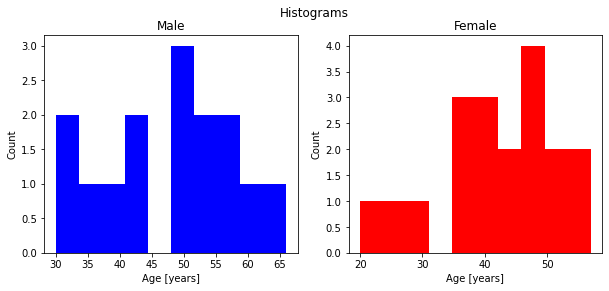

<IPython.core.display.Javascript object>

In [17]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4)) # (10,4) chosen since it looks nice
# Left figure (indexing 0)
ax[0].hist(df['age'][df['sex'] == 'M'], color = 'blue')
ax[0].set_xlabel('Age [years]')
ax[0].set_ylabel('Count')
ax[0].set_title('Male')

# Right figure (indexing 0)
ax[1].hist(df['age'][df['sex'] == 'F'], color = 'red')
ax[1].set_xlabel('Age [years]')
ax[1].set_ylabel('Count')
ax[1].set_title('Female')

# Common title:
plt.suptitle('Histograms')
plt.show()

## 2.3 Introducing: Seaborn

Potentially this already felt a bit cumbersome. Indeed, matplotlib provides you a lot of freedom, but to really get a publishable figure, we would need to write many lines of code.

Hene, sometimes it is nice to benefit from other packages that have built upon matplotlib! Let's touch upon one in particular: `Seaborn`. Import it under the name `sns`, since this is, like `plt`, a consensus in the python language. It will be handy on stackoverflow! However, you can name it any way you want. For now, run: `import seaborn as sns`.

Let's again plot a histogram. We will, however, use some knowledge we have gained on matplotlib:
1. Initiage a subplot instance: `fig, ax = plt.subplots()`
2. Assign a seaborn histogram to the ax object. Do this by assiging your `ax` object to the `ax` argument of the function: `sns.histplot(x, ax = ax)`. `x` is your data vector.

Solution:

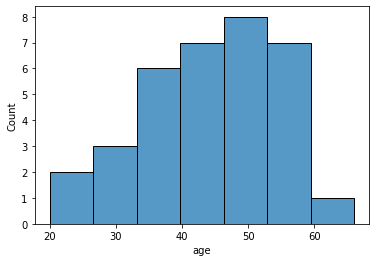

<IPython.core.display.Javascript object>

In [47]:
import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(df['age'], ax = ax)
plt.show()

Noticed something? 
- Seaborn works well with pandas! The columnnames are used as labels by default.
- The figure doesn't exactly match the previous one. Let's set `bins` to 10. Now you can compare them :)

Let's integrate what we have learned! Can you make the plot with following descriptions:
- 2 plots above each other
- The upper is the distribution of the `whole_brain` column. Instead of a histogram, plot the Kernel Density Estimation (KDE) with `sns.kdeplot()`.
- The lower is a scatterplot between `age` (x) and `whole_brain` (y). HINT: use `sns.scatterplot()` or `sns.regplot()` (adds regression line).
- All plots should be red

Solution:

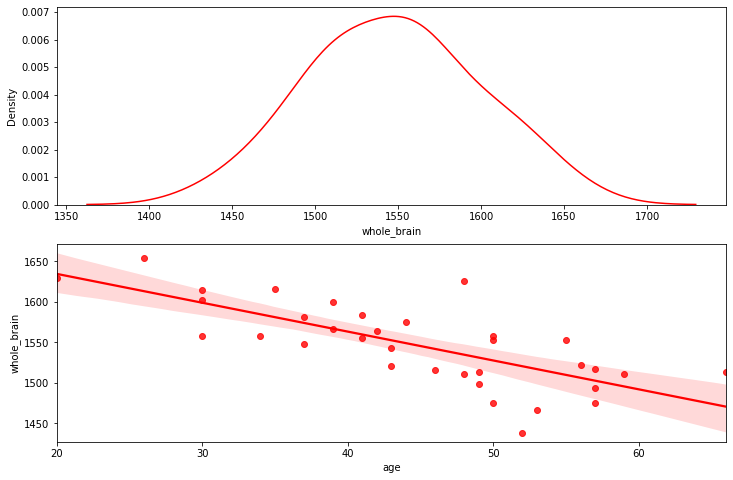

<IPython.core.display.Javascript object>

In [48]:
fig, ax = plt.subplots(nrows = 2, figsize = (12,8))
sns.kdeplot(df['whole_brain'], ax = ax[0], color = 'red')
sns.regplot(x = df['age'], y = df['whole_brain'], color = 'red')
plt.show()

Nice figure eh? Only 4 lines of code!

## 2.4 Manipulating an ax object in a function

Say that we have a figure with 3x3 subplots, and we want to plot all possible relations between the following features:
- `age`: amount of years from birth
- `whole_brain`: Whole brain volume 
- `Ln`: Performance on the new language being learned

It will be quite cumbersome to plot everything manually, so why not write a function? Let's go through the steps:
- Create an empty grid with `plt.subplots()`
- Write a function `add_regplot` that takes an `ax` object as argument. Within that function, manipulate the `ax` object to your preferences. Return the ax object afterwards.
- Write a nested for loop, with both loops looping over the same features stated above. HINT: the `enumerate()` function allows you to keep track of a "counter". E.g. `for index, feature in enumerate(['age', 'whole_brain', 'Ln'])` will assign the list elements to the `feature` variable, while `index` takes `0`, `1` and `2` for iteration 1, 2 and 3 respectively.
- Extract the column for each feature by `df[feature]`. Pass these, along with the subplot you want to plot it on (remember to index your `ax` object!) to the function and assign it to the same subplot.

Solution:

In [49]:
def add_regplot(ax, x, y):
    sns.regplot(ax = ax, x = x, y = y)
    return ax

<IPython.core.display.Javascript object>

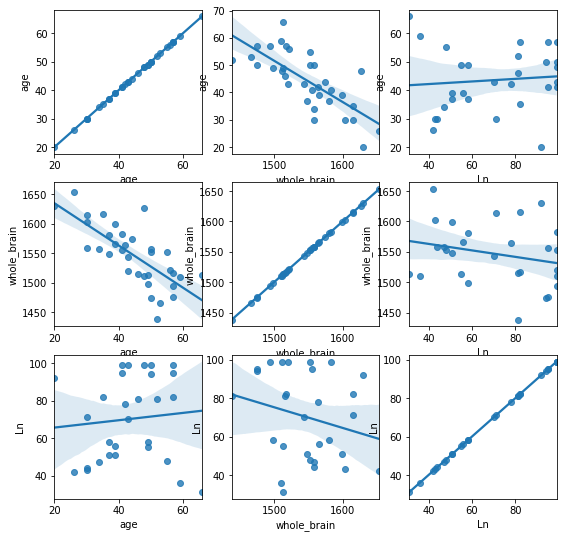

<IPython.core.display.Javascript object>

In [50]:
fig,ax = plt.subplots(nrows=3,ncols=3, figsize = (9,9))
for col_nr, feature_1 in enumerate(['age', 'whole_brain', 'Ln']):
    for row_nr, feature_2 in enumerate(['age', 'whole_brain', 'Ln']):
        ax[row_nr, col_nr] = add_regplot(ax = ax[row_nr, col_nr], x = df[feature_1], y = df[feature_2])

## 2.5 Visualisation options for data exploration

Congratulations! With some adaptations on the former figure, you would get to what is called a **"pairplot"**. The diagonal figures are not that useful right? In a pairplot, the diagonal is the distribution of that feature, which maximizes the information inside the plot. 

Seaborn has one too: `sns.pairplot()`, and it works very well with pandas. Try it yourself! Use the function and give a pandas dataframe as argument. To reduce the size of the pairplot: Only select some columns of the dataframe.
- NOTE: There are many adaptations possible to pairplots to adapt it to your preferences (add regression lines, textboxes (bit more advanced though), change the diagonal to KDE plots, ...). For example, try changing some parameters such as `kind` and `scatter_kws`, like suggested in the following [post](https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot). Also, the `hue` parameter allows you to change colors based on a categorical/dichotomous variable! Try adding `hue = 'sex'` to the pairplot (CAVE: you then also need to add that column to the column selection of your dataframe).

Solution:

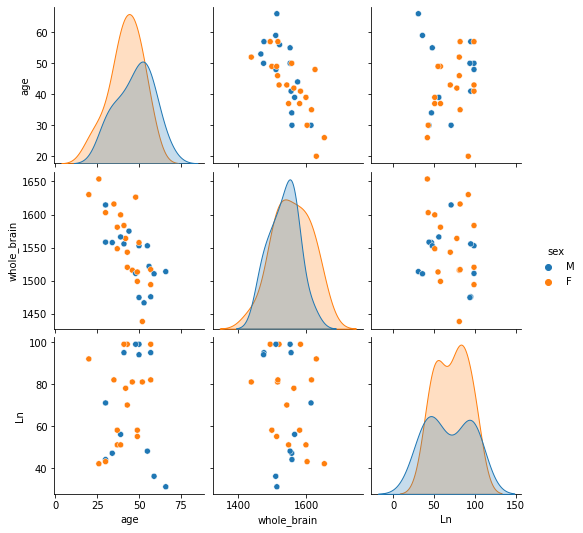

<IPython.core.display.Javascript object>

In [51]:
sns.pairplot(df[['age', 'whole_brain', 'Ln', 'sex']], diag_kind = 'kde', hue = 'sex')

A pairplot is a nice tool for data exploration. But what if we have a lot of variables? Wouldn't our pairplot become huge? Exactly. That is why you can also use a nice [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) with `sns.heatmap()`. Again, this works nice with pandas, this time e.g. with the `.corr()` function applied to the dataframe. The latter function will return an n x n square matrix, with 1's on the diagonal (perfectly correlated), and the upper and lower triangle mirrored. Recognize the pairplot in this structure? Bet you did :) 

Let's make one with the desired variables!

Solution:

<AxesSubplot:>

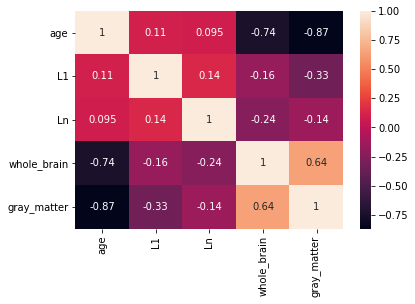

<IPython.core.display.Javascript object>

In [45]:
sns.heatmap(df.corr(), annot = True)

# Acknowledgement and Data source

## References for use of this data

In [222]:
print(references)

layout.description['ReferencesAndLinks']


<IPython.core.display.Javascript object>

## Contact information of owners of the datasets

In [ ]:
print(contact)